<a href="https://colab.research.google.com/github/oskrtrom/CursosVerano2025/blob/main/ChatmateModel01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets torch pandas openpyxl scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from transformers import GPT2Tokenizer

# Cargar el tokenizador de GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Definir un token de padding (GPT-2 no tiene uno por defecto)
tokenizer.pad_token = tokenizer.eos_token  # Usamos el token de fin de secuencia como padding

# Texto de ejemplo
texto = "El servicio fue terrible, no volveré a comprar"

# Tokenizar (convertir a números) con padding
tokens = tokenizer.encode(texto, truncation=True, padding="max_length", max_length=50)

print(tokens)  # Imprime la versión tokenizada del texto


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

[9527, 37756, 952, 37911, 7818, 11, 645, 2322, 332, 2634, 257, 12084, 283, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]


In [4]:
import pandas as pd
from transformers import GPT2Tokenizer

# Cargar el tokenizador de GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Definir un token de padding (GPT-2 no tiene uno por defecto)
tokenizer.pad_token = tokenizer.eos_token  # Usamos el token de fin de secuencia como padding

# Cargar el archivo Excel y ver las columnas disponibles
df = pd.read_excel("chatmate_data.xlsx")  # Asegúrate de que el archivo existe en la ruta correcta

# 🔹 Mostrar nombres de las columnas para verificar cuál usar
print("Columnas disponibles en el archivo:", df.columns)

# 🔹 Si la columna no tiene el nombre exacto, intenta detectar el nombre correcto
columna_texto = None
for col in df.columns:
    if "mensaje" in col.lower() or "comentario" in col.lower() or "texto" in col.lower():
        columna_texto = col
        break

if columna_texto is None:
    raise ValueError("❌ No se encontró una columna con texto. Revisa el archivo Excel.")

# 🔹 Extraer los textos de la columna correcta
textos = df[columna_texto].astype(str).tolist()  # Convertir a lista de strings

# 🔹 Tokenizar todos los textos
tokens = [tokenizer.encode(texto, truncation=True, padding="max_length", max_length=50) for texto in textos]

# 🔹 Mostrar los tokens del primer ejemplo
print(f"📌 Primer mensaje tokenizado: {tokens[0]}")


Columnas disponibles en el archivo: Index(['Mensaje', 'Toxicidad', 'Emoción', 'Contexto',
       'Indicador de Mal Humor'],
      dtype='object')
📌 Primer mensaje tokenizado: [35, 14378, 1556, 292, 3031, 68, 21349, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]


In [6]:
import pandas as pd
import torch
import numpy as np
from datasets import Dataset as HFDataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# -----------------------------------------------------------
# 1. Cargar y Preprocesar los Datos
# -----------------------------------------------------------
data_path = "chatmate_data.xlsx"
df = pd.read_excel(data_path)

def map_toxicity(value):
    if value <= 3:
        return 0  # Baja toxicidad
    elif value <= 6:
        return 1  # Toxicidad media
    else:
        return 2  # Alta toxicidad

df["Toxicity_Class"] = df["Toxicidad"].apply(map_toxicity)

# Dividir datos en entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["Mensaje"].tolist(), df["Toxicity_Class"].tolist(), test_size=0.2, random_state=42
)

# -----------------------------------------------------------
# 2. Tokenización con BERT
# -----------------------------------------------------------
bert_model_path = "dccuchile/bert-base-spanish-wwm-cased"
tokenizer = BertTokenizer.from_pretrained(bert_model_path)

def tokenize_function(examples):
    return tokenizer(examples["Mensaje"], padding="max_length", truncation=True, max_length=128)

dataset = DatasetDict({
    "train": HFDataset.from_dict({"Mensaje": train_texts, "labels": train_labels}),
    "test": HFDataset.from_dict({"Mensaje": test_texts, "labels": test_labels})
})
dataset = dataset.map(tokenize_function, batched=True).remove_columns("Mensaje")

# -----------------------------------------------------------
# 3. Cargar modelo previo o crear uno nuevo
# -----------------------------------------------------------
MODEL_PATH = "./chatmate_model"

try:
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH, num_labels=3)
    print("✅ Modelo previo cargado correctamente.")
except:
    print("⚠️ No se encontró un modelo previo. Entrenando uno nuevo...")
    model = BertForSequenceClassification.from_pretrained(bert_model_path, num_labels=3)

# -----------------------------------------------------------
# 4. Definir Métricas de Evaluación
# -----------------------------------------------------------
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)

    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1  # Ahora se incluye F1 para evitar errores
    }

# -----------------------------------------------------------
# 5. Configuración del Entrenamiento
# -----------------------------------------------------------
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",  # Ahora se puede usar porque compute_metrics lo devuelve
    greater_is_better=True,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    compute_metrics=compute_metrics,  # Se añaden métricas de evaluación
)

# -----------------------------------------------------------
# 6. Iniciar el Entrenamiento
# -----------------------------------------------------------
trainer.train()

# -----------------------------------------------------------
# 7. Guardar el Modelo Entrenado
# -----------------------------------------------------------
model.save_pretrained(MODEL_PATH)
tokenizer.save_pretrained(MODEL_PATH)
print("✅ Entrenamiento finalizado y modelo guardado en:", MODEL_PATH)


Map:   0%|          | 0/783 [00:00<?, ? examples/s]

Map:   0%|          | 0/196 [00:00<?, ? examples/s]

✅ Modelo previo cargado correctamente.


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.879291,0.785714,0.802662,0.785714,0.790369
2,No log,1.002768,0.806122,0.814347,0.806122,0.808878


✅ Entrenamiento finalizado y modelo guardado en: ./chatmate_model


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# -----------------------------------------------------------
# 1. Cargar Modelo Entrenado
# -----------------------------------------------------------
MODEL_PATH = "./chatmate_model"

# Cargar el modelo y el tokenizador
tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
model = BertForSequenceClassification.from_pretrained(MODEL_PATH)

# -----------------------------------------------------------
# 2. Función para Predecir Toxicidad
# -----------------------------------------------------------
def predict_toxicity(message):
    inputs = tokenizer(message, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

toxicidad_map = {
    0: "Baja toxicidad (0-3)",
    1: "Toxicidad media (4-6)",
    2: "Alta toxicidad (7-10)"
}

# -----------------------------------------------------------
# 3. Prueba de Chat con Modelo Guardado
# -----------------------------------------------------------
def chat_test():
    print("Prueba de chat iniciada. Escribe 'salir' para terminar.")
    while True:
        message = input("Usuario: ")
        if message.lower() in ['salir', 'exit', 'quit']:
            print("Terminando la prueba de chat.")
            break
        prediction = predict_toxicity(message)
        print("Predicción de toxicidad:", toxicidad_map[prediction])

chat_test()


Prueba de chat iniciada. Escribe 'salir' para terminar.
Usuario: hola como estas
Predicción de toxicidad: Baja toxicidad (0-3)
Usuario: tonto
Predicción de toxicidad: Baja toxicidad (0-3)
Usuario: acaso eres tonto
Predicción de toxicidad: Baja toxicidad (0-3)
Usuario: me estas diciendo tonto
Predicción de toxicidad: Toxicidad media (4-6)
Usuario: me haces reir tonto
Predicción de toxicidad: Toxicidad media (4-6)
Usuario: estupido
Predicción de toxicidad: Alta toxicidad (7-10)
Usuario: acaso eres estupido
Predicción de toxicidad: Alta toxicidad (7-10)
Usuario: me crees estupido
Predicción de toxicidad: Alta toxicidad (7-10)
Usuario: matar
Predicción de toxicidad: Alta toxicidad (7-10)
Usuario: crees q soy un idiota
Predicción de toxicidad: Toxicidad media (4-6)
Usuario: me vez con cara de idiota
Predicción de toxicidad: Alta toxicidad (7-10)
Usuario: eres una bestia no sabes nada
Predicción de toxicidad: Alta toxicidad (7-10)
Usuario: dejame en paz
Predicción de toxicidad: Alta toxicida

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Ruta donde guardaremos el modelo
MODEL_PATH = "./chatmate_model_v1"

# Guardar modelo y tokenizer
model.save_pretrained(MODEL_PATH)
tokenizer.save_pretrained(MODEL_PATH)

print(f"✅ Modelo guardado en {MODEL_PATH}")


✅ Modelo guardado en ./chatmate_model_v1


In [ ]:
import pandas as pd
import torch
import numpy as np
from datasets import Dataset as HFDataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# -----------------------------------------------------------
# 1. Definir Función para Calcular Métricas
# -----------------------------------------------------------
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)

    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted", zero_division=1)

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# -----------------------------------------------------------
# 2. Cargar y Preprocesar Datos
# -----------------------------------------------------------
def load_and_preprocess_data(data_path):
    df = pd.read_excel(data_path)

    def map_toxicity(value):
        if value <= 3:
            return 0  # Baja toxicidad
        elif value <= 6:
            return 1  # Toxicidad media
        else:
            return 2  # Alta toxicidad

    df["Toxicity_Class"] = df["Toxicidad"].apply(map_toxicity)

    # División en entrenamiento y prueba
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        df["Mensaje"].tolist(), df["Toxicity_Class"].tolist(), test_size=0.2, random_state=42
    )

    return train_texts, test_texts, train_labels, test_labels

# -----------------------------------------------------------
# 3. Tokenización con BERT
# -----------------------------------------------------------
def tokenize_data(train_texts, test_texts, train_labels, test_labels, tokenizer):
    def tokenize_function(examples):
        return tokenizer(examples["Mensaje"], padding="max_length", truncation=True, max_length=128)

    dataset = DatasetDict({
        "train": HFDataset.from_dict({"Mensaje": train_texts, "labels": train_labels}),
        "test": HFDataset.from_dict({"Mensaje": test_texts, "labels": test_labels})
    })
    dataset = dataset.map(tokenize_function, batched=True).remove_columns("Mensaje")

    return dataset

# -----------------------------------------------------------
# 4. Cargar Modelo y Tokenizador
# -----------------------------------------------------------
def load_model_and_tokenizer(model_path):
    tokenizer = BertTokenizer.from_pretrained(model_path)
    model = BertForSequenceClassification.from_pretrained(model_path, num_labels=3)
    return model, tokenizer

# -----------------------------------------------------------
# 5. Configurar Entrenamiento
# -----------------------------------------------------------
def train_model(model, dataset, training_args):
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset["train"],
        eval_dataset=dataset["test"],
        compute_metrics=compute_metrics,  # Asegura que `f1` se calcula correctamente
    )
    trainer.train()

# -----------------------------------------------------------
# 6. Guardar Modelo Mejorado
# -----------------------------------------------------------
def save_model(model, tokenizer, save_path):
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"✅ Reentrenamiento finalizado. Modelo actualizado guardado en {save_path}")

# -----------------------------------------------------------
# 7. Ejecutar Todo el Proceso
# -----------------------------------------------------------
if __name__ == "__main__":
    # Configuración de rutas
    MODEL_PATH = "./chatmate_model_v1"
    NEW_MODEL_PATH = "./chatmate_model_v2"
    DATA_PATH = "chatmate_data.xlsx"

    # Cargar datos
    train_texts, test_texts, train_labels, test_labels = load_and_preprocess_data(DATA_PATH)

    # Cargar modelo y tokenizador
    model, tokenizer = load_model_and_tokenizer(MODEL_PATH)

    # Tokenizar datos
    dataset = tokenize_data(train_texts, test_texts, train_labels, test_labels, tokenizer)

    # Definir parámetros de entrenamiento
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,  # Ajustar según la necesidad
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="f1",  # Ahora sí funciona correctamente
        greater_is_better=True,
        save_total_limit=2,
    )

    # Entrenar el modelo
    train_model(model, dataset, training_args)

    # Guardar el modelo actualizado
    save_model(model, tokenizer, NEW_MODEL_PATH)


Map:   0%|          | 0/783 [00:00<?, ? examples/s]

Map:   0%|          | 0/196 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.377808,0.862245,0.868213,0.862245,0.864523
2,No log,0.426569,0.872449,0.874812,0.872449,0.873394


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.377808,0.862245,0.868213,0.862245,0.864523
2,No log,0.426569,0.872449,0.874812,0.872449,0.873394
3,No log,0.478234,0.877551,0.881588,0.877551,0.878965


✅ Reentrenamiento finalizado. Modelo actualizado guardado en ./chatmate_model_v2


In [ ]:
#Mejorado para Probar el Chatbot
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Ruta del modelo más reciente
MODEL_PATH = "./chatmate_model_v2"
# Ajusta según el último modelo guardado

# Cargar modelo y tokenizador
tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
model = BertForSequenceClassification.from_pretrained(MODEL_PATH)

# Función para predecir toxicidad en los mensajes
def predict_toxicity(message):
    inputs = tokenizer(message, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    return predicted_class

# Mapeo de categorías de toxicidad
toxicidad_map = {
    0: "Baja toxicidad (0-3)",
    1: "Toxicidad media (4-6)",
    2: "Alta toxicidad (7-10)"
}

# Prueba de chat con el modelo actualizado
def chat_test():
    print("🗨️ Prueba de chat iniciada. Escribe 'salir' para terminar.")
    while True:
        message = input("Usuario: ")
        if message.lower() in ['salir', 'exit', 'quit']:
            print("🛑 Terminando la prueba de chat.")
            break
        prediction = predict_toxicity(message)
        print("🤖 Predicción de toxicidad:", toxicidad_map[prediction])

chat_test()


🗨️ Prueba de chat iniciada. Escribe 'salir' para terminar.
Usuario: me haces reir, eres un tontito
🤖 Predicción de toxicidad: Alta toxicidad (7-10)
Usuario: quit
🛑 Terminando la prueba de chat.


In [ ]:
#Cargar Siempre el Modelo Más Reciente en el Chatbot
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# 🔹 Cargar el modelo más reciente
MODEL_PATH = "./chatmate_model_v2"  # Ajusta según el último modelo guardado

try:
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    print(f"✅ Modelo cargado exitosamente desde {MODEL_PATH}")
except:
    print(f"❌ Error: No se encontró el modelo en {MODEL_PATH}. Verifica la ruta.")

# 🔹 Función para predecir toxicidad
def predict_toxicity(message):
    inputs = tokenizer(message, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# 🔹 Mapeo de categorías de toxicidad
toxicidad_map = {
    0: "🟢 Baja toxicidad (0-3)",
    1: "🟡 Toxicidad media (4-6)",
    2: "🔴 Alta toxicidad (7-10)"
}

# 🔹 Chat interactivo
def chat_test():
    print("\n🗨️ **Prueba de chat iniciada**. Escribe 'salir' para terminar.")
    while True:
        message = input("\n👤 Usuario: ")
        if message.lower() in ['salir', 'exit', 'quit']:
            print("\n🛑 **Prueba finalizada.**")
            break
        prediction = predict_toxicity(message)
        print(f"🤖 **ChatMate**: Predicción de toxicidad -> {toxicidad_map[prediction]}")

chat_test()


✅ Modelo cargado exitosamente desde ./chatmate_model_v2

🗨️ **Prueba de chat iniciada**. Escribe 'salir' para terminar.

👤 Usuario: eres tonto
🤖 **ChatMate**: Predicción de toxicidad -> 🟢 Baja toxicidad (0-3)

👤 Usuario: me crees un tonto
🤖 **ChatMate**: Predicción de toxicidad -> 🟡 Toxicidad media (4-6)

👤 Usuario: acaso eres un tonto
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)

👤 Usuario: quit

🛑 **Prueba finalizada.**


In [ ]:
# Código Mejorado para Probar el Chatbot
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# 🔹 Cargar el modelo más reciente
MODEL_PATH = "./chatmate_model_v2"  # Ajusta según el último modelo guardado

try:
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    print(f"✅ Modelo cargado exitosamente desde {MODEL_PATH}")
except:
    print(f"❌ Error: No se encontró el modelo en {MODEL_PATH}. Verifica la ruta.")

# 🔹 Función para predecir toxicidad
def predict_toxicity(message):
    inputs = tokenizer(message, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# 🔹 Mapeo de categorías de toxicidad
toxicidad_map = {
    0: "🟢 Baja toxicidad (0-3)",
    1: "🟡 Toxicidad media (4-6)",
    2: "🔴 Alta toxicidad (7-10)"
}

# 🔹 Chat interactivo
def chat_test():
    print("\n🗨️ **Prueba de chat iniciada**. Escribe 'salir' para terminar.")
    while True:
        message = input("\n👤 Usuario: ")
        if message.lower() in ['salir', 'exit', 'quit']:
            print("\n🛑 **Prueba finalizada.**")
            break
        prediction = predict_toxicity(message)
        print(f"🤖 **ChatMate**: Predicción de toxicidad -> {toxicidad_map[prediction]}")

chat_test()


✅ Modelo cargado exitosamente desde ./chatmate_model_v2

🗨️ **Prueba de chat iniciada**. Escribe 'salir' para terminar.

👤 Usuario: hola crees que soy un tonto
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)

👤 Usuario: me has visto la cara de tonto
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)

👤 Usuario: tonto
🤖 **ChatMate**: Predicción de toxicidad -> 🟢 Baja toxicidad (0-3)

👤 Usuario: quit

🛑 **Prueba finalizada.**


In [ ]:
#Código Mejorado: Chatbot con GPT-2 para Respuestas Inteligentes
import torch
from transformers import BertTokenizer, BertForSequenceClassification, GPT2LMHeadModel, GPT2Tokenizer

# 🔹 Cargar el modelo de clasificación de toxicidad (BERT)
MODEL_PATH = "./chatmate_model_v2"
try:
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    print(f"✅ Modelo de clasificación de toxicidad cargado desde {MODEL_PATH}")
except:
    print(f"❌ Error: No se encontró el modelo en {MODEL_PATH}. Verifica la ruta.")

# 🔹 Cargar el modelo de generación de texto (GPT-2)
GPT2_PATH = "datificate/gpt2-small-spanish"  # Modelo GPT-2 en español
try:
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained(GPT2_PATH)
    gpt2_model = GPT2LMHeadModel.from_pretrained(GPT2_PATH)
    print(f"✅ Modelo GPT-2 cargado exitosamente.")
except:
    print(f"❌ Error al cargar GPT-2. Verifica la ruta o instala el modelo.")

# 🔹 Función para predecir toxicidad del mensaje
def predict_toxicity(message):
    inputs = tokenizer(message, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# 🔹 Mapeo de toxicidad
toxicidad_map = {
    0: "🟢 Baja toxicidad (0-3)",
    1: "🟡 Toxicidad media (4-6)",
    2: "🔴 Alta toxicidad (7-10)"
}

# 🔹 Función para generar respuestas con GPT-2
def generate_response(message):
    prompt = f"Reformula este mensaje en un tono más amigable: {message}"
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors="pt")

    # Generación de respuesta con GPT-2
    output = gpt2_model.generate(input_ids, max_length=50, num_return_sequences=1, pad_token_id=gpt2_tokenizer.eos_token_id)
    response = gpt2_tokenizer.decode(output[0], skip_special_tokens=True)

    return response

# 🔹 Chat interactivo mejorado
def chat_test():
    print("\n🗨️ **Prueba de chat con GPT-2 iniciada**. Escribe 'salir' para terminar.")
    while True:
        message = input("\n👤 Usuario: ")
        if message.lower() in ['salir', 'exit', 'quit']:
            print("\n🛑 **Prueba finalizada.**")
            break

        prediction = predict_toxicity(message)
        print(f"🤖 **ChatMate**: Predicción de toxicidad -> {toxicidad_map[prediction]}")

        if prediction > 0:  # Si hay toxicidad media o alta, reformular con GPT-2
            response = generate_response(message)
            print(f"🤖 **ChatMate**: {response}")
        else:
            print("🤖 **ChatMate**: Me alegra tu mensaje 😊")

chat_test()


✅ Modelo de clasificación de toxicidad cargado desde ./chatmate_model_v2


tokenizer_config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/850k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/508k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

✅ Modelo GPT-2 cargado exitosamente.

🗨️ **Prueba de chat con GPT-2 iniciada**. Escribe 'salir' para terminar.


model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]


👤 Usuario: me vez con cara de tonto, que te pasa
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)
🤖 **ChatMate**: Reformula este mensaje en un tono más amigable: me vez con cara de tonto, que te pasa con cara de tonto.

En el siguiente mensaje, el mensaje se refiere a la situación de la familia, y se refiere a la situación de

👤 Usuario: acaso piensas que soy un tonto
🤖 **ChatMate**: Predicción de toxicidad -> 🟡 Toxicidad media (4-6)
🤖 **ChatMate**: Reformula este mensaje en un tono más amigable: acaso piensas que soy un tonto, pero no es así.

El mensaje de la carta es:

El mensaje de la carta es:

El mensaje de la carta es:

👤 Usuario: creo que estamos mal no entiendo que es lo que pasa
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)
🤖 **ChatMate**: Reformula este mensaje en un tono más amigable: creo que estamos mal no entiendo que es lo que pasa con la vida, pero que es lo que pasa con la vida.

En el año 2000, el profesor de la Universidad de 

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, GPT2LMHeadModel, GPT2Tokenizer

# 🔹 Cargar el modelo de clasificación de toxicidad (BERT)
MODEL_PATH = "./chatmate_model_v2"  # Asegúrate de que esta es la última versión del modelo
try:
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    print(f"✅ Modelo de clasificación de toxicidad cargado desde {MODEL_PATH}")
except Exception as e:
    print(f"❌ Error al cargar BERT: {e}")

# 🔹 Cargar el modelo de generación de texto (GPT-2)
GPT2_PATH = "datificate/gpt2-small-spanish"  # Modelo GPT-2 en español
try:
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained(GPT2_PATH)
    gpt2_model = GPT2LMHeadModel.from_pretrained(GPT2_PATH)
    print(f"✅ Modelo GPT-2 cargado exitosamente.")
except Exception as e:
    print(f"❌ Error al cargar GPT-2: {e}")

# 🔹 Función para predecir toxicidad del mensaje
def predict_toxicity(message):
    inputs = tokenizer(message, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# 🔹 Mapeo de toxicidad
toxicidad_map = {
    0: "🟢 Baja toxicidad (0-3)",
    1: "🟡 Toxicidad media (4-6)",
    2: "🔴 Alta toxicidad (7-10)"
}

# 🔹 Función para generar respuestas con GPT-2 (mejorada)
def generate_response(message):
    prompt = f"Convierte este mensaje en una versión amable y conciliadora: '{message}'"
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors="pt")

    output = gpt2_model.generate(
        input_ids,
        max_length=30,  # Reducido para evitar respuestas largas
        num_return_sequences=1,
        pad_token_id=gpt2_tokenizer.eos_token_id,
        top_k=50,  # Controla la aleatoriedad
        top_p=0.92,  # Filtra palabras menos probables para mejorar coherencia
        temperature=0.7  # Ajuste de creatividad
    )

    response = gpt2_tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# 🔹 Chat interactivo mejorado
def chat_test():
    print("\n🗨️ **Prueba de chat con GPT-2 iniciada**. Escribe 'salir' para terminar.")
    while True:
        message = input("\n👤 Usuario: ")
        if message.lower() in ['salir', 'exit', 'quit']:
            print("\n🛑 **Prueba finalizada.**")
            break

        prediction = predict_toxicity(message)
        print(f"🤖 **ChatMate**: Predicción de toxicidad -> {toxicidad_map[prediction]}")

        if prediction > 0:  # Si hay toxicidad media o alta, reformular con GPT-2
            response = generate_response(message)
            print(f"🤖 **ChatMate**: {response}")
        else:
            print("🤖 **ChatMate**: Me alegra tu mensaje 😊")

chat_test()


✅ Modelo de clasificación de toxicidad cargado desde ./chatmate_model_v2
✅ Modelo GPT-2 cargado exitosamente.

🗨️ **Prueba de chat con GPT-2 iniciada**. Escribe 'salir' para terminar.

👤 Usuario: me estas diciendo tonto 
🤖 **ChatMate**: Predicción de toxicidad -> 🟡 Toxicidad media (4-6)


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.92` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


🤖 **ChatMate**: Convierte este mensaje en una versión amable y conciliadora: 'me estas diciendo tonto 'y no quiero ser mi novia', 'me estas diciendo '

👤 Usuario: eres un imbecil como vas a confundir eso 
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)
🤖 **ChatMate**: Convierte este mensaje en una versión amable y conciliadora: 'eres un imbecil como vas a confundir eso '».

El mensaje de

👤 Usuario: quit

🛑 **Prueba finalizada.**


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, GPT2LMHeadModel, GPT2Tokenizer

# 🔹 Cargar el modelo de clasificación de toxicidad (BERT)
MODEL_PATH = "./chatmate_model_v2"  # Asegúrate de que esta es la última versión del modelo

try:
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    print(f"✅ Modelo de clasificación de toxicidad cargado desde {MODEL_PATH}")
except Exception as e:
    print(f"❌ Error al cargar BERT: {e}")

# 🔹 Cargar el modelo de generación de texto (GPT-2)
GPT2_PATH = "datificate/gpt2-small-spanish"  # Modelo GPT-2 en español

try:
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained(GPT2_PATH)
    gpt2_model = GPT2LMHeadModel.from_pretrained(GPT2_PATH)
    print(f"✅ Modelo GPT-2 cargado exitosamente.")
except Exception as e:
    print(f"❌ Error al cargar GPT-2: {e}")

# 🔹 Función para predecir toxicidad del mensaje con BERT
def predict_toxicity(message):
    inputs = tokenizer(message, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# 🔹 Mapeo de toxicidad
toxicidad_map = {
    0: "🟢 Baja toxicidad (0-3)",
    1: "🟡 Toxicidad media (4-6)",
    2: "🔴 Alta toxicidad (7-10)"
}

# 🔹 Función mejorada para generar respuestas con GPT-2
def generate_response(message):
    prompt = f"Alguien me dijo esto: '{message}'. ¿Cómo puedo responder de manera calmada y positiva?"
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors="pt")

    output = gpt2_model.generate(
        input_ids,
        max_length=30,  # Evita respuestas largas y sin sentido
        num_return_sequences=1,
        pad_token_id=gpt2_tokenizer.eos_token_id,
        top_k=50,  # Reduce la aleatoriedad de la generación
        top_p=0.85,  # Filtra palabras menos probables para mejorar coherencia
        temperature=0.6  # Controla la creatividad y aleatoriedad del modelo
    )

    response = gpt2_tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# 🔹 Chat interactivo con detección de toxicidad y reformulación con GPT-2
def chat_test():
    print("\n🗨️ **Prueba de chat con GPT-2 iniciada**. Escribe 'salir' para terminar.")
    while True:
        message = input("\n👤 Usuario: ")
        if message.lower() in ['salir', 'exit', 'quit']:
            print("\n🛑 **Prueba finalizada.**")
            break

        prediction = predict_toxicity(message)
        print(f"🤖 **ChatMate**: Predicción de toxicidad -> {toxicidad_map[prediction]}")

        if prediction > 0:  # Si hay toxicidad media o alta, reformular con GPT-2
            response = generate_response(message)
            print(f"🤖 **ChatMate**: {response}")
        else:
            print("🤖 **ChatMate**: Me alegra tu mensaje 😊")

# 🔹 Ejecutar el chat interactivo
chat_test()


✅ Modelo de clasificación de toxicidad cargado desde ./chatmate_model_v2
✅ Modelo GPT-2 cargado exitosamente.

🗨️ **Prueba de chat con GPT-2 iniciada**. Escribe 'salir' para terminar.

👤 Usuario: eres tonto acaso, que te pasa
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.85` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


🤖 **ChatMate**: Alguien me dijo esto: 'eres tonto acaso, que te pasa'. ¿Cómo puedo responder de manera calmada y positiva?'

En

👤 Usuario: creo que eres un imbecil
🤖 **ChatMate**: Predicción de toxicidad -> 🔴 Alta toxicidad (7-10)
🤖 **ChatMate**: Alguien me dijo esto: 'creo que eres un imbecil'. ¿Cómo puedo responder de manera calmada y positiva?'



👤 Usuario: quit

🛑 **Prueba finalizada.**


In [ ]:
import torch
from transformers import Trainer, BertTokenizer, BertForSequenceClassification
from datasets import Dataset

# 🔹 Cargar modelo correctamente
MODEL_PATH = "./chatmate_model_v2"

try:
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    print(f"✅ Modelo cargado correctamente desde {MODEL_PATH}")
except Exception as e:
    print(f"❌ Error al cargar el modelo: {e}")

# 🔹 Tokenizar los textos
def tokenize_function(examples):
    return tokenizer(examples["Mensaje"], padding="max_length", truncation=True, max_length=128)

# 🔹 Convertir el dataset de prueba a formato Hugging Face y aplicar tokenización
test_dataset_hf = Dataset.from_dict({"Mensaje": test_texts, "labels": test_labels})
test_dataset_hf = test_dataset_hf.map(tokenize_function, batched=True).remove_columns(["Mensaje"])

# 🔹 Evaluar el modelo
trainer = Trainer(model=model)
predictions = trainer.predict(test_dataset_hf)

# 🔹 Convertir predicciones a etiquetas
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1)

print("✅ Evaluación completada. Predicciones obtenidas.")


✅ Modelo cargado correctamente desde ./chatmate_model_v2


Map:   0%|          | 0/979 [00:00<?, ? examples/s]

✅ Evaluación completada. Predicciones obtenidas.


✅ Modelo cargado desde ./chatmate_model_v2


Map:   0%|          | 0/979 [00:00<?, ? examples/s]


📊 **Métricas del Modelo:**
✔️ Accuracy: 0.9683
✔️ Precision: 0.9685
✔️ Recall: 0.9683
✔️ F1-score: 0.9684


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


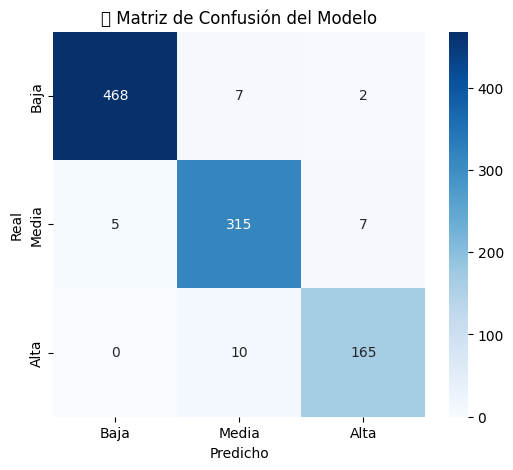

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


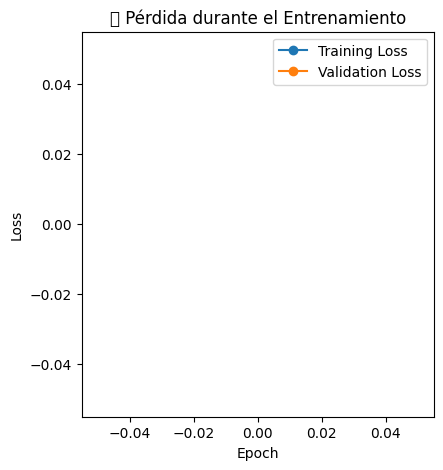

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# 🔹 Ruta del modelo guardado
MODEL_PATH = "./chatmate_model_v2"  # Ajusta según el modelo más reciente

# 🔹 Cargar modelo y tokenizador
try:
    tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    print(f"✅ Modelo cargado desde {MODEL_PATH}")
except Exception as e:
    print(f"❌ Error al cargar el modelo: {e}")

# 🔹 Cargar dataset de prueba
DATA_PATH = "chatmate_data.xlsx"  # Asegúrate de que este archivo existe
df = pd.read_excel(DATA_PATH)

# 🔹 Mapeo de toxicidad para clasificar correctamente
def map_toxicity(value):
    if value <= 3:
        return 0  # Baja toxicidad
    elif value <= 6:
        return 1  # Toxicidad media
    else:
        return 2  # Alta toxicidad

df["Toxicity_Class"] = df["Toxicidad"].apply(map_toxicity)

# 🔹 Preparar datos de prueba
test_texts = df["Mensaje"].tolist()
test_labels = df["Toxicity_Class"].tolist()

# 🔹 Tokenizar los datos de prueba
def tokenize_function(examples):
    return tokenizer(examples["Mensaje"], padding="max_length", truncation=True, max_length=128)

# 🔹 Convertir datos en Dataset de Hugging Face
test_dataset_hf = Dataset.from_dict({"Mensaje": test_texts, "labels": test_labels})
test_dataset_hf = test_dataset_hf.map(tokenize_function, batched=True).remove_columns(["Mensaje"])

# 🔹 Evaluar el modelo
trainer = Trainer(model=model)
predictions = trainer.predict(test_dataset_hf)

# 🔹 Obtener etiquetas predichas
preds = np.argmax(predictions.predictions, axis=1)

# 🔹 Calcular métricas de rendimiento
accuracy = accuracy_score(test_labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, preds, average="weighted", zero_division=1)

# 🔹 Mostrar métricas
print(f"\n📊 **Métricas del Modelo:**")
print(f"✔️ Accuracy: {accuracy:.4f}")
print(f"✔️ Precision: {precision:.4f}")
print(f"✔️ Recall: {recall:.4f}")
print(f"✔️ F1-score: {f1:.4f}")

# 🔹 Matriz de confusión
conf_matrix = confusion_matrix(test_labels, preds)

# 🔹 Visualizar matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("🔹 Matriz de Confusión del Modelo")
plt.show()

# 🔹 Obtener historial de entrenamiento
history = trainer.state.log_history

# 🔹 Extraer valores de pérdida y precisión
train_loss = [x["loss"] for x in history if "loss" in x]
eval_loss = [x["eval_loss"] for x in history if "eval_loss" in x]
eval_accuracy = [x["eval_accuracy"] for x in history if "eval_accuracy" in x]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))

# 🔹 Gráfico de pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss", marker="o")
plt.plot(epochs, eval_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("📉 Pérdida durante el Entrenamiento")

# 🔹 Gráfico de precisión (Accuracy)
if eval_accuracy:  # Verifica si hay datos de precisión
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(eval_accuracy) + 1), eval_accuracy, marker='o', linestyle='dashed', label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("📈 Precisión del Modelo")

plt.show()
